# Model creation

In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Dataset

In [55]:
df = pd.read_csv(
    "drug_consumption_2.txt",
    header=None,
    names=[
        "idx",
        "N-Score",
        "E-Score",
        "O-Score",
        "A-Score",
        "C-Score",
        "Impusiveness",
        "Sensation seeking",
        "Amphet",
        "Benzo",
        "Cannabis",
        "Heroin",
        "Ketamine",
        "Methadone",
        "Semeron",
    ],
)

df.head()

,idx,N-Score,E-Score,O-Score,A-Score,C-Score,Impusiveness,Sensation seeking,Amphet,Benzo,Cannabis,Heroin,Ketamine,Methadone,Semeron
0,1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,0,0,0
1,2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,0,0,0,0
2,3,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,0,0
3,4,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,0,0,0,0
4,5,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,0,0,0,0


## Decision Tree

In [56]:
models = {}
metrics = {}

for target in df.iloc[:, 8:15].columns:
    # Get train and test data splits, stratisfy for target.
    target_train_df, target_test_df = train_test_split(
        df, train_size=0.8, shuffle=True, stratify=df[target], random_state=0
    )

    # Get input and target from the data split.
    target_x_train, target_y_train = (
        target_train_df.iloc[:, 1:8],
        target_train_df.iloc[:, 8:15][target],
    )
    target_x_test, target_y_test = (
        target_test_df.iloc[:, 1:8],
        target_test_df.iloc[:, 8:15][target],
    )

    # Create classifier.
    target_clf = DecisionTreeClassifier()

    # Train model with data specified for target.
    target_clf.fit(target_x_train, target_y_train)
    models[target] = target_clf

    # Evaluate trained classifier.
    target_y_predictions = target_clf.predict(target_x_test)

    # Calculate metrics.
    accuracy = accuracy_score(target_y_test, target_y_predictions)
    precision = precision_score(target_y_test, target_y_predictions)
    recall = recall_score(target_y_test, target_y_predictions)
    f1 = f1_score(target_y_test, target_y_predictions)

    metrics[target] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
    }

models, metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'Amphet': DecisionTreeClassifier(),
  'Benzo': DecisionTreeClassifier(),
  'Cannabis': DecisionTreeClassifier(),
  'Heroin': DecisionTreeClassifier(),
  'Ketamine': DecisionTreeClassifier(),
  'Methadone': DecisionTreeClassifier(),
  'Semeron': DecisionTreeClassifier()},
 {'Amphet': {'accuracy': 0.883289124668435,
   'precision': 0.0,
   'recall': 0.0,
   'f1_score': 0.0},
  'Benzo': {'accuracy': 0.9071618037135278,
   'precision': 0.13636363636363635,
   'recall': 0.15789473684210525,
   'f1_score': 0.14634146341463414},
  'Cannabis': {'accuracy': 0.6259946949602122,
   'precision': 0.2894736842105263,
   'recall': 0.3548387096774194,
   'f1_score': 0.31884057971014496},
  'Heroin': {'accuracy': 0.9549071618037135,
   'precision': 0.0,
   'recall': 0.0,
   'f1_score': 0.0},
  'Ketamine': {'accuracy': 0.9973474801061007,
   'precision': 0.0,
   'recall': 0.0,
   'f1_score': 0.0},
  'Methadone': {'accuracy': 0.8992042440318302,
   'precision': 0.07407407407407407,
   'recall': 0.13333

## K-NN

In [ ]:
models = {}
metrics = {}

for target in df.iloc[:, 8:15].columns:
    # Get train and test data splits, stratisfy for target.
    target_train_df, target_test_df = train_test_split(
        df, train_size=0.8, shuffle=True, stratify=df[target], random_state=0
    )

    # Get input and target from the data split.
    target_x_train, target_y_train = (
        target_train_df.iloc[:, 1:8],
        target_train_df.iloc[:, 8:15][target],
    )
    target_x_test, target_y_test = (
        target_test_df.iloc[:, 1:8],
        target_test_df.iloc[:, 8:15][target],
    )

    # Create classifier.
    target_neigh = KNeighborsClassifier(n_neighbors=5)

    # Train model with data specified for target.
    target_neigh.fit(target_x_train, target_y_train)
    models[target] = target_neigh

    # Evaluate trained classifier.
    target_y_predictions = models[target].predict(target_x_test)

    # Calculate metrics.
    accuracy = accuracy_score(target_y_test, target_y_predictions)
    precision = precision_score(target_y_test, target_y_predictions)
    recall = recall_score(target_y_test, target_y_predictions)
    f1 = f1_score(target_y_test, target_y_predictions)

    metrics[target] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
    }

models, metrics

## Random Forest

In [ ]:
models = {}
metrics = {}

for target in df.iloc[:, 8:15].columns:
    # Get train and test data splits, stratisfy for target.
    target_train_df, target_test_df = train_test_split(
        df, train_size=0.8, shuffle=True, stratify=df[target], random_state=0
    )

    # Get input and target from the data split.
    target_x_train, target_y_train = (
        target_train_df.iloc[:, 1:8],
        target_train_df.iloc[:, 8:15][target],
    )
    target_x_test, target_y_test = (
        target_test_df.iloc[:, 1:8],
        target_test_df.iloc[:, 8:15][target],
    )

    # Create classifier.
    target_clf = RandomForestClassifier(n_estimators=100, random_state=0)

    # Train model with data specified for target.
    target_clf.fit(target_x_train, target_y_train)
    models[target] = target_clf

    # Evaluate trained classifier.
    target_y_predictions = target_clf.predict(target_x_test)

    # Calculate metrics.
    accuracy = accuracy_score(target_y_test, target_y_predictions)
    precision = precision_score(target_y_test, target_y_predictions)
    recall = recall_score(target_y_test, target_y_predictions)
    f1 = f1_score(target_y_test, target_y_predictions)

    metrics[target] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
    }

models, metrics

## SHAP

In [ ]:
# imports
!pip install shap
import shap

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [173]:
feature_names = [
    "N-Score",
    "E-Score",
    "O-Score",
    "A-Score",
    "C-Score",
    "Impusiveness",
    "Sensation seeking",
]
X = df[feature_names]

pre_vars = list(models.keys())
pre_vars

In [174]:
def get_shap(y_var):
    # get the overall figure on SHAP based on one target variable

    # get shap values
    shap_explainer = shap.Explainer(models[y_var])
    shap_values = shap_explainer(X)
    # print(shap_values.shape)

    # get model predictions
    preds = models[y_var].predict(X)

    # convert 3-D shap_values to 2-D
    new_shap_value = []
    for i, pred in enumerate(preds):
        # get shap value
        # print(i, pred)
        new_shap_value.append(shap_values.values[i][:, pred])

    # replace shap values
    shap_values.values = np.array(new_shap_value)
    # print(shap_values.shape)

    return shap_values

    # plot mean |shap| value
    # shap.plots.bar(shap_values)

    # Beeswarm plot
    # shap.plots.beeswarm(shap_values)

In [ ]:
# show the beeswarm figures
def show_beeswarm(choose_var):
    for i in range(1, 3):
        plt.subplot(1, 2, i)
        var_now = choose_var[i - 1]
        plt.title(var_now)

        # calculate shap values
        shap_values = get_shap(var_now)

        # plot
        shap.plots.beeswarm(shap_values, max_display=10, show=False)

    plt.subplots_adjust(left=1, bottom=0.1, right=3)

    plt.show()

In [76]:
models

{'Amphet': DecisionTreeClassifier(),
 'Benzo': DecisionTreeClassifier(),
 'Cannabis': DecisionTreeClassifier(),
 'Heroin': DecisionTreeClassifier(),
 'Ketamine': DecisionTreeClassifier(),
 'Methadone': DecisionTreeClassifier(),
 'Semeron': DecisionTreeClassifier()}

## Overall view on SHAP

0 0 Amphet
0 1 Benzo
0 2 Cannabis
0 3 Heroin
1 0 Ketamine
1 1 Methadone
1 2 Semeron


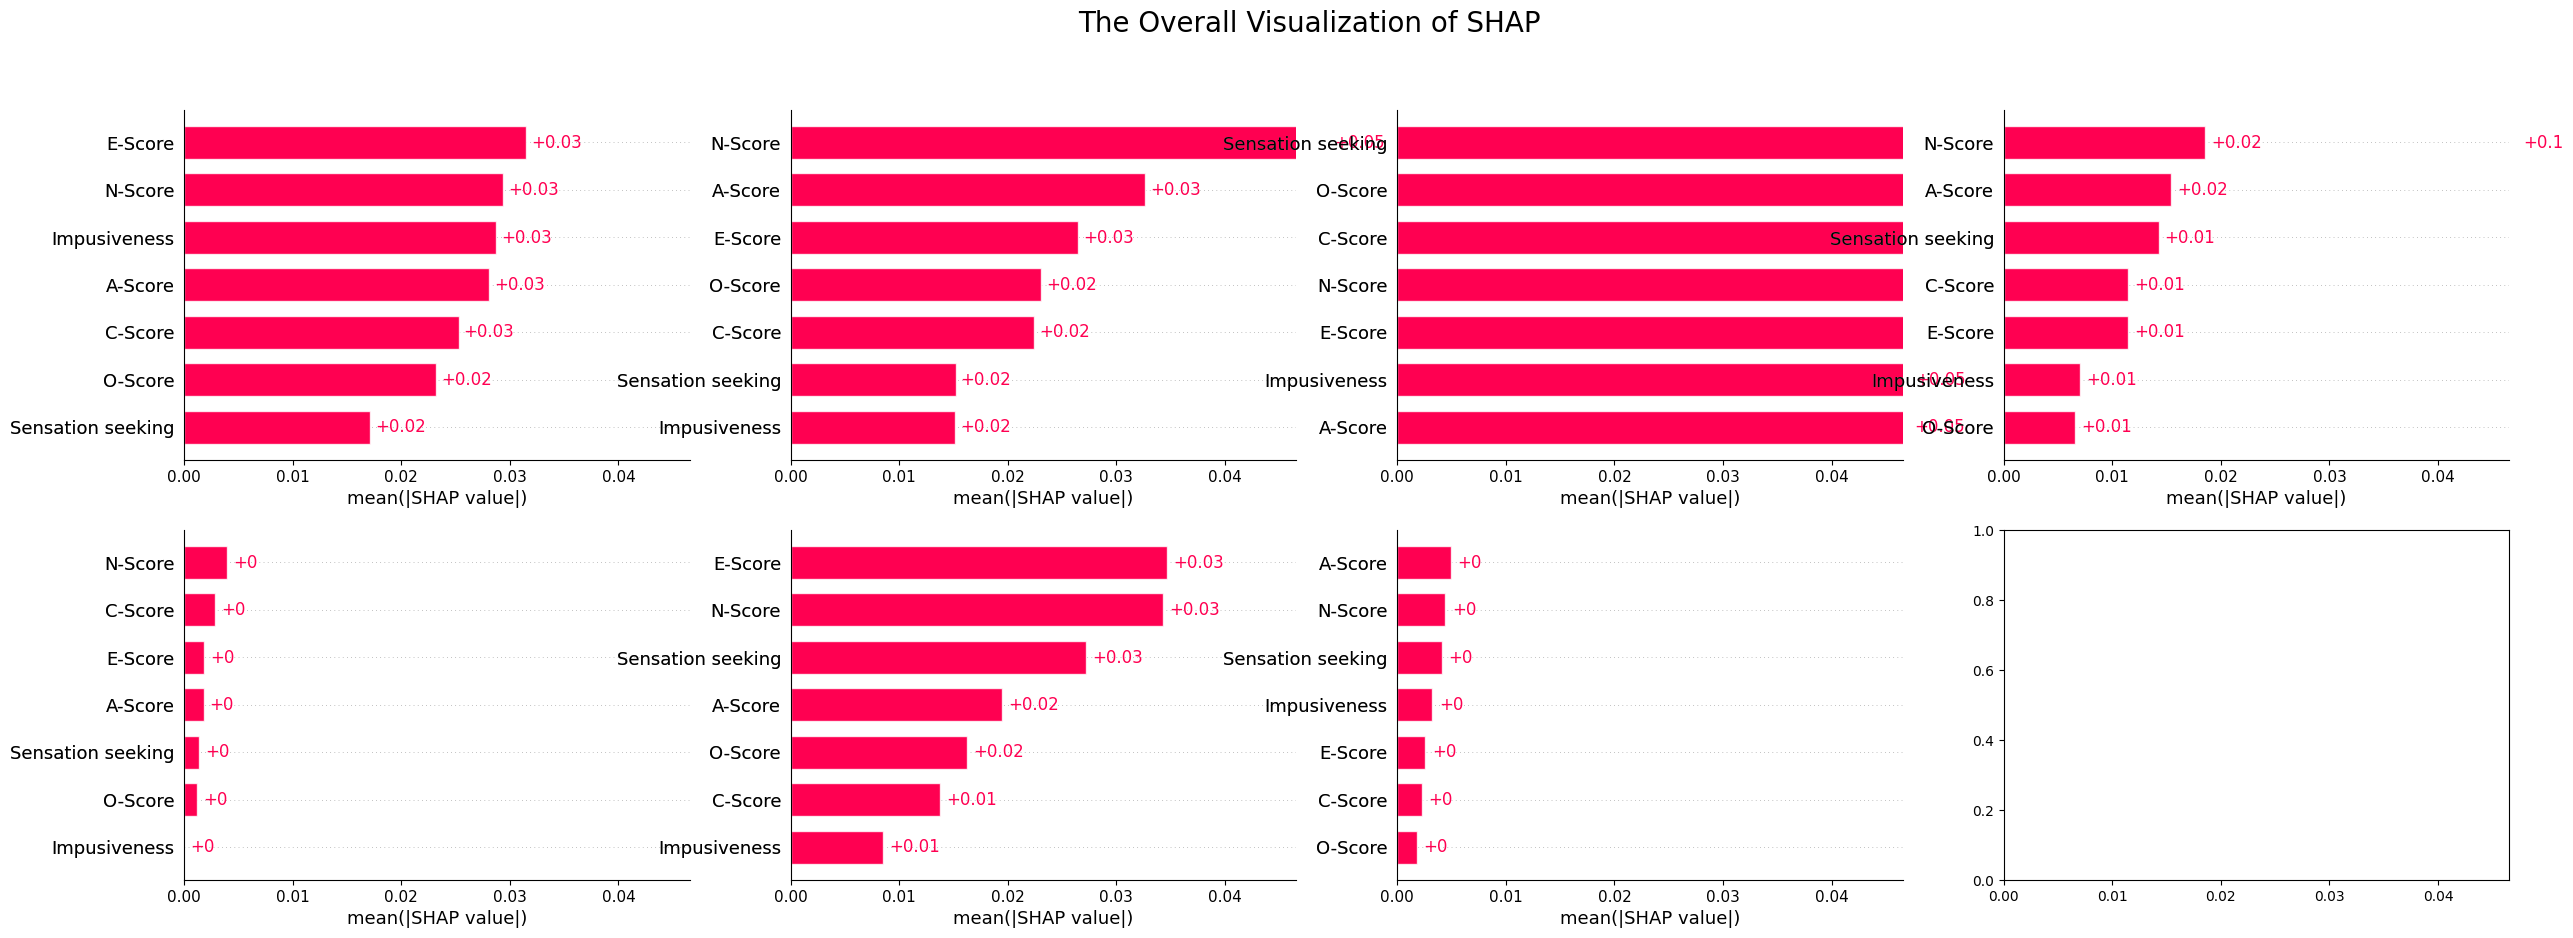

In [208]:
figure, axes = plt.subplots(2, 4, sharex=True, figsize=(30, 10))
figure.suptitle("The Overall Visualization of SHAP", fontsize=20)

for i in range(1, 8):
    if i <= 4:
        num_row = 0
        num_col = i - 1
    else:
        num_row = 1
        num_col = i - 5

    con = pre_vars[i - 1]

    print(num_row, num_col, con)
    shap_values = get_shap(con)
    shap.plots.bar(shap_values, ax=axes[num_row, num_col], show=False)

    # shap.plots.beeswarm(shap_values, axes=axes[num_row, num_col])

plt.show()

## check the importance of features by beeswarm

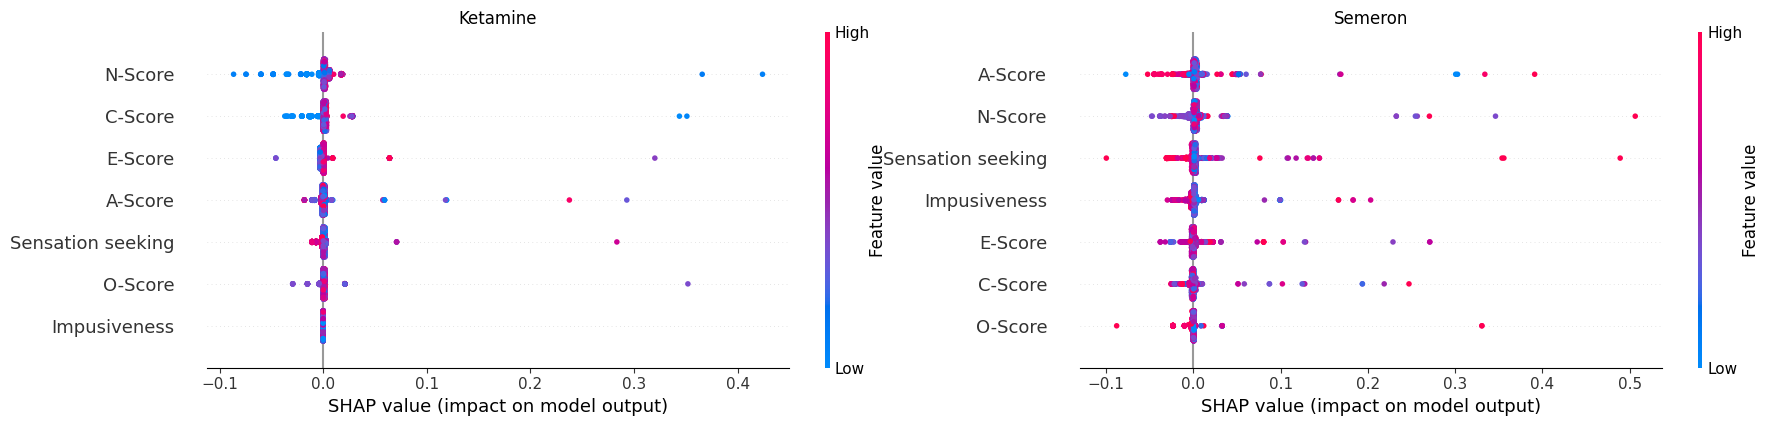

In [222]:
# check the most unable to explain cases
unuse_var = ["Ketamine", "Semeron"]

plt.figure()

show_beeswarm(unuse_var)

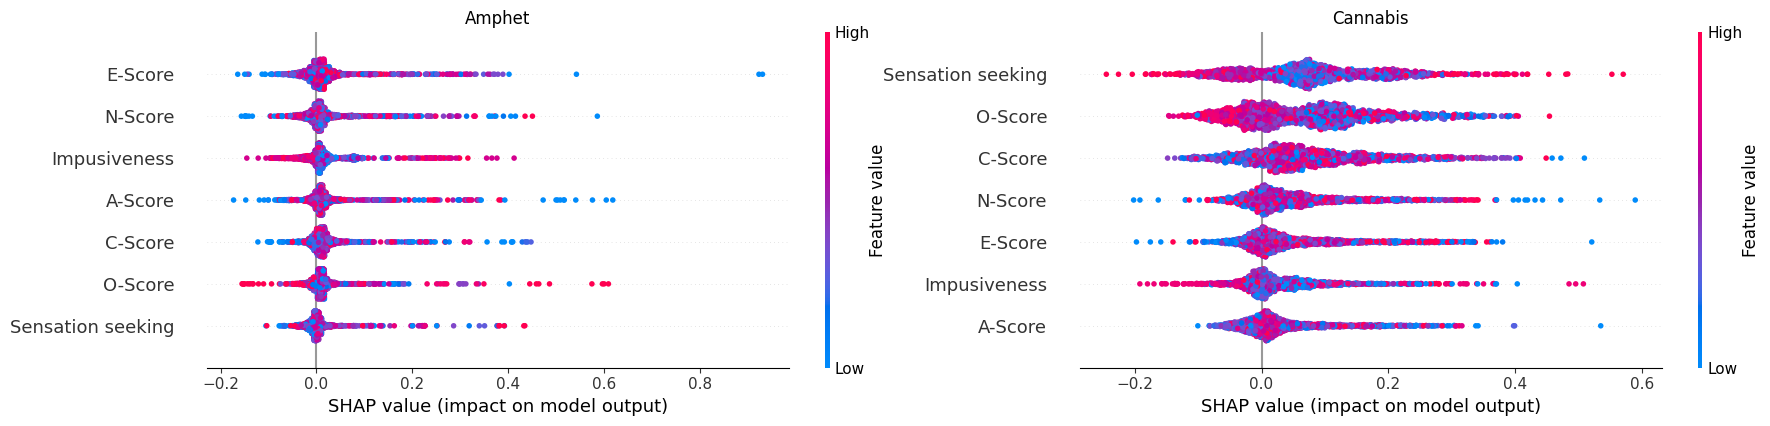

In [221]:
# check the cases that most explainable
use_var = ["Amphet", "Cannabis"]
plt.figure()

show_beeswarm(use_var)

## detailed check on singal variable

In [223]:
check_var = "Cannabis"

x_var = [
    "N-Score",
    "E-Score",
    "O-Score",
    "A-Score",
    "C-Score",
    "Impusiveness",
    "Sensation seeking",
]

In [ ]:
# heatmap
[
    "N-Score",
    "E-Score",
    "O-Score",
    "A-Score",
    "C-Score",
    "Impusiveness",
    "Sensation seeking",
]
shap.plots.heatmap(shap_values, instance_order=df["Sensation seeking"].values.argsort())

In [247]:
def show_hetmap(choose_y, i):
    x_var_now = x_var[i - 1]
    plt.title(str(choose_y) + " (sorted by " + str(x_var_now) + ")")

    # calculate shap values
    shap_values = get_shap(choose_y)

    # plot
    shap.plots.heatmap(shap_values, instance_order=df[x_var_now].values.argsort())

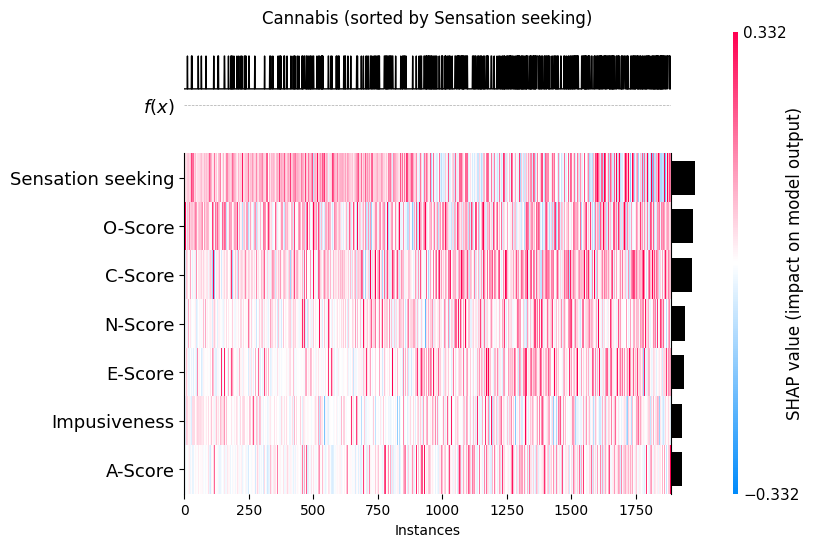

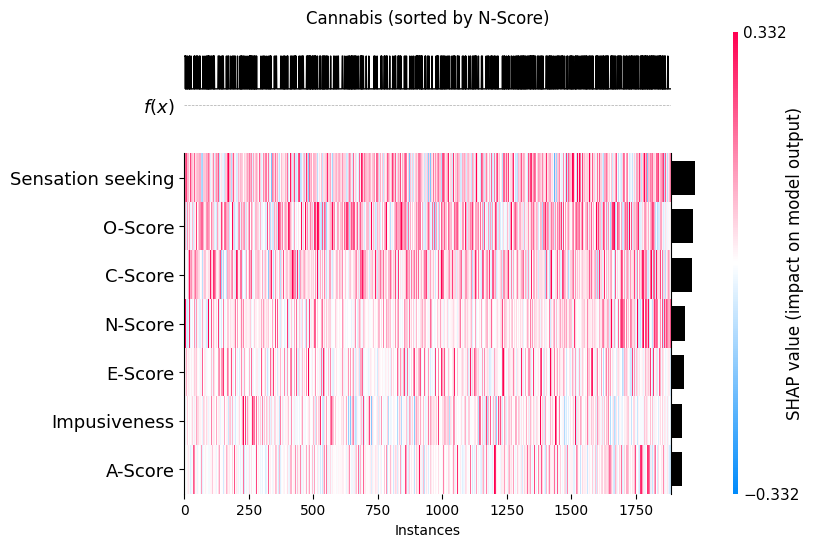

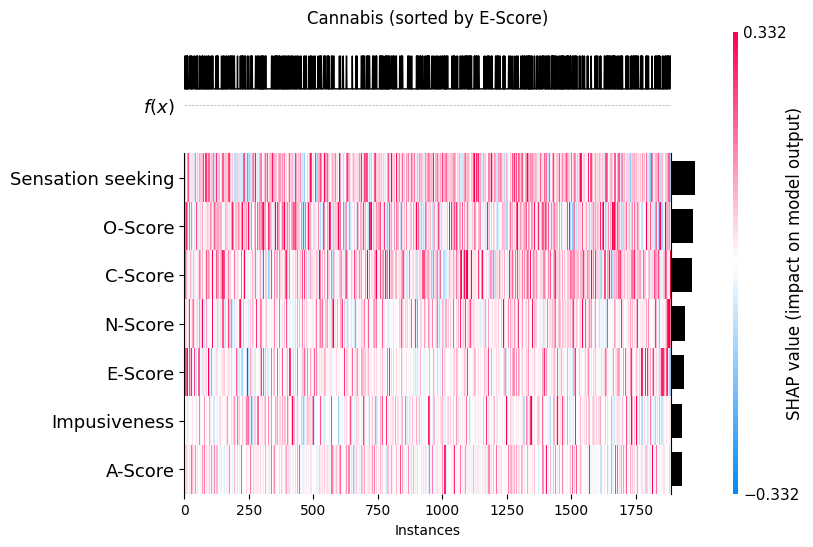

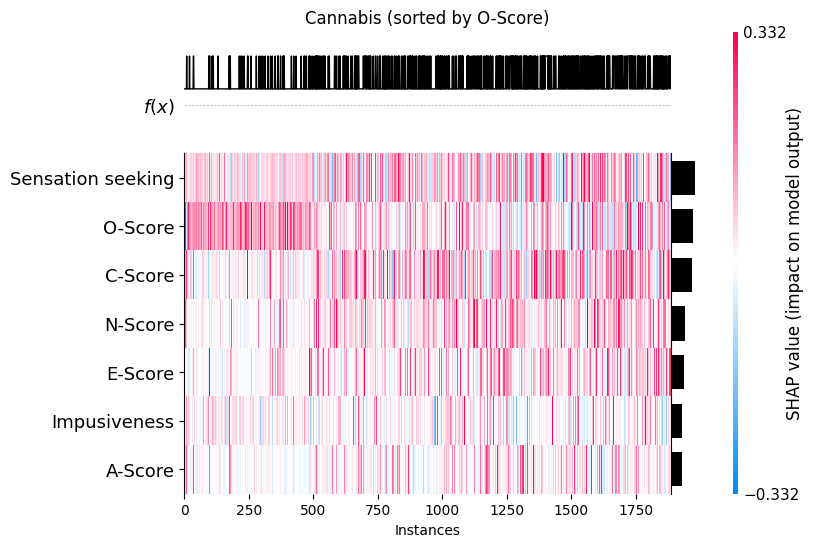

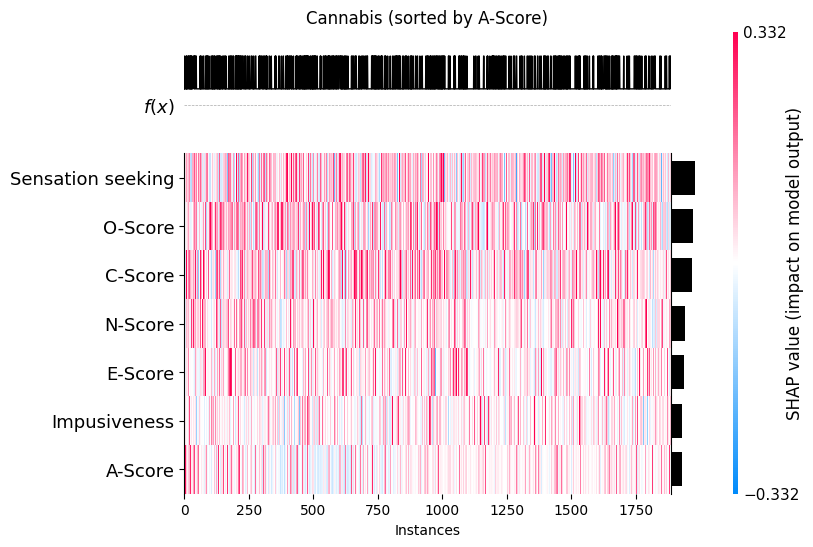

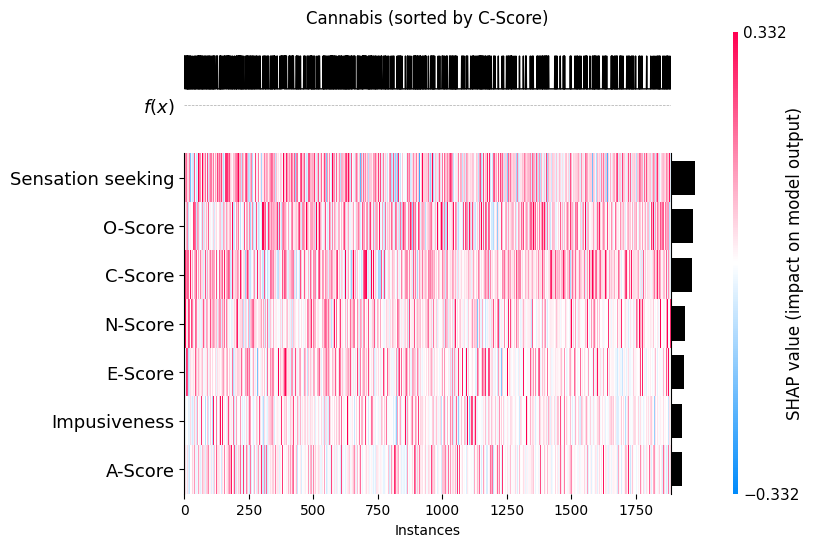

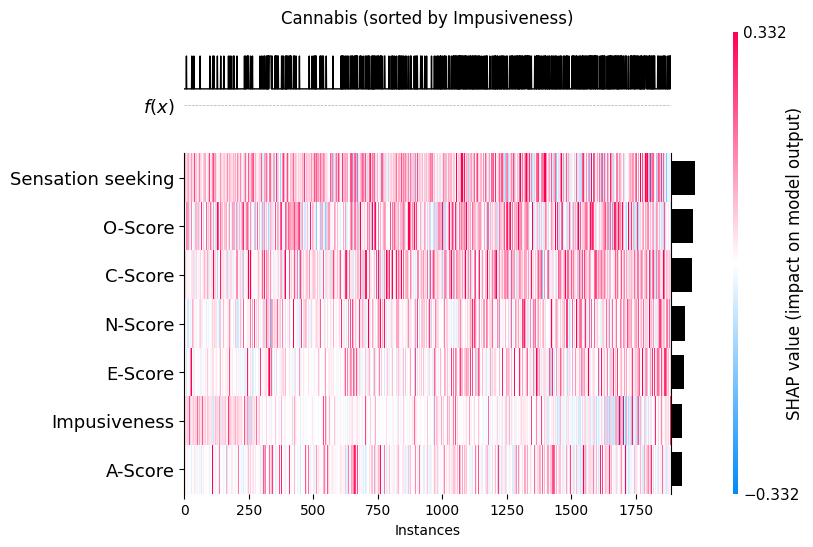

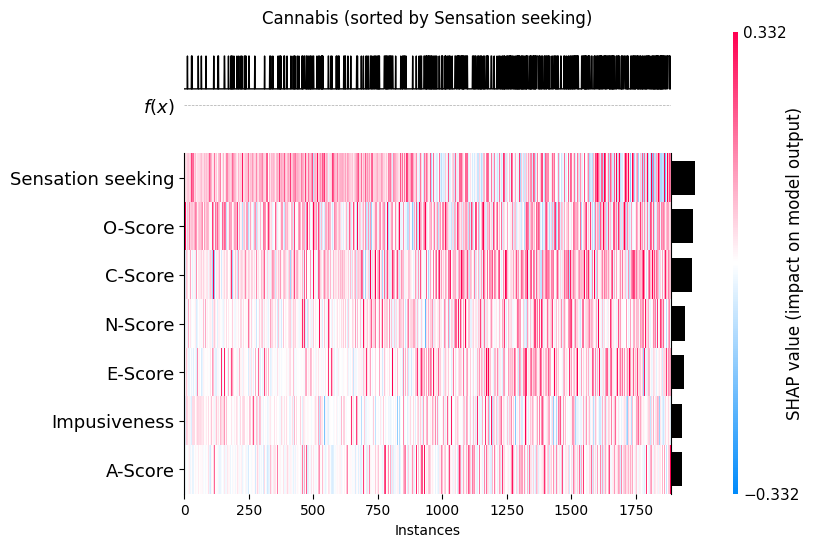

In [248]:
for i in range(8):
    show_hetmap(check_var, i)
    # print(x_var[i-1])